In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/TP ML Grupal/

/content/drive/MyDrive/TP ML Grupal


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.linear_model import LogisticRegressionCV
from sklearn.impute import SimpleImputer
#from imbalanced_ensemble.ensemble import SelfPacedEnsembleClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import RepeatedStratifiedKFold, RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

In [ ]:
# Lectura del dataset
patientDS = pd.read_csv('dataset.csv')  

In [ ]:
patientDS.head()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.73,0,Caucasian,M,180.3,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
1,114252,59342,81,77.0,27.42,0,Caucasian,F,160.0,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
2,119783,50777,118,25.0,31.95,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
3,79267,46918,118,81.0,22.64,1,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0


# Analisis De Datos

In [ ]:
patientDS.describe()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,weight,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,Unnamed: 83,hospital_death
count,91713.000000,91713.000000,91713.000000,87485.000000,88284.000000,91713.000000,90379.000000,91713.000000,91713.000000,88993.000000,...,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,0.0,91713.000000
mean,65606.079280,65537.131464,105.669262,62.309516,29.185818,0.183736,169.641588,508.357692,0.835766,84.028340,...,0.000857,0.015693,0.225192,0.012989,0.026165,0.007066,0.004132,0.020638,NaN,0.086302
std,37795.088538,37811.252183,62.854406,16.775119,8.275142,0.387271,10.795378,228.989661,2.487756,25.011497,...,0.029265,0.124284,0.417711,0.113229,0.159628,0.083763,0.064148,0.142169,NaN,0.280811
min,1.000000,1.000000,2.000000,16.000000,14.844926,0.000000,137.200000,82.000000,-24.947222,38.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,32852.000000,32830.000000,47.000000,52.000000,23.641975,0.000000,162.500000,369.000000,0.035417,66.800000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
50%,65665.000000,65413.000000,109.000000,65.000000,27.654655,0.000000,170.100000,504.000000,0.138889,80.300000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
75%,98342.000000,98298.000000,161.000000,75.000000,32.930206,0.000000,177.800000,679.000000,0.409028,97.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
max,131051.000000,131051.000000,204.000000,89.000000,67.814990,1.000000,195.590000,927.000000,159.090972,186.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000


In [ ]:
patientDS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 85 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   91713 non-null  int64  
 1   patient_id                     91713 non-null  int64  
 2   hospital_id                    91713 non-null  int64  
 3   age                            87485 non-null  float64
 4   bmi                            88284 non-null  float64
 5   elective_surgery               91713 non-null  int64  
 6   ethnicity                      90318 non-null  object 
 7   gender                         91688 non-null  object 
 8   height                         90379 non-null  float64
 9   icu_admit_source               91601 non-null  object 
 10  icu_id                         91713 non-null  int64  
 11  icu_stay_type                  91713 non-null  object 
 12  icu_type                       91713 non-null 

In [ ]:
patientDS.nunique()

encounter_id                   91713
patient_id                     91713
hospital_id                      147
age                               74
bmi                            34888
                               ...  
solid_tumor_with_metastasis        2
apache_3j_bodysystem              11
apache_2_bodysystem               10
Unnamed: 83                        0
hospital_death                     2
Length: 85, dtype: int64

In [ ]:
#Demasiados Nulls
patientDS=patientDS.drop(columns=["Unnamed: 83"])
#Son codigos internos del hospital
#patientDS=patientDS.drop(columns=["apache_2_diagnosis"])
#patientDS=patientDS.drop(columns=["apache_3j_diagnosis"])
#Etiquetas de pacientes
patientDS=patientDS.drop(columns=["encounter_id"])
patientDS=patientDS.drop(columns=["patient_id"])

#Es lo que buscamos

patientDS=patientDS.drop(columns=["apache_4a_hospital_death_prob"])
patientDS=patientDS.drop(columns=["apache_4a_icu_death_prob"])


# Analisis de features categóricas

In [ ]:
stringCols = patientDS.select_dtypes(include=object)
for col in stringCols:
  print(col, "- Valores:", patientDS[col].unique())

ethnicity - Valores: ['Caucasian' nan 'Hispanic' 'African American' 'Asian' 'Native American'
 'Other/Unknown']
gender - Valores: ['M' 'F' nan]
icu_admit_source - Valores: ['Floor' 'Accident & Emergency' 'Operating Room / Recovery'
 'Other Hospital' 'Other ICU' nan]
icu_stay_type - Valores: ['admit' 'readmit' 'transfer']
icu_type - Valores: ['CTICU' 'Med-Surg ICU' 'CCU-CTICU' 'Neuro ICU' 'MICU' 'SICU'
 'Cardiac ICU' 'CSICU']
apache_3j_bodysystem - Valores: ['Sepsis' 'Respiratory' 'Metabolic' 'Cardiovascular' 'Trauma'
 'Neurological' 'Gastrointestinal' 'Genitourinary' nan 'Hematological'
 'Musculoskeletal/Skin' 'Gynecological']
apache_2_bodysystem - Valores: ['Cardiovascular' 'Respiratory' 'Metabolic' 'Trauma' 'Neurologic'
 'Gastrointestinal' 'Renal/Genitourinary' nan 'Undefined diagnoses'
 'Haematologic' 'Undefined Diagnoses']


In [ ]:
stringCols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ethnicity             90318 non-null  object
 1   gender                91688 non-null  object
 2   icu_admit_source      91601 non-null  object
 3   icu_stay_type         91713 non-null  object
 4   icu_type              91713 non-null  object
 5   apache_3j_bodysystem  90051 non-null  object
 6   apache_2_bodysystem   90051 non-null  object
dtypes: object(7)
memory usage: 4.9+ MB


In [ ]:
stringCols.nunique()

ethnicity                6
gender                   2
icu_admit_source         5
icu_stay_type            3
icu_type                 8
apache_3j_bodysystem    11
apache_2_bodysystem     10
dtype: int64

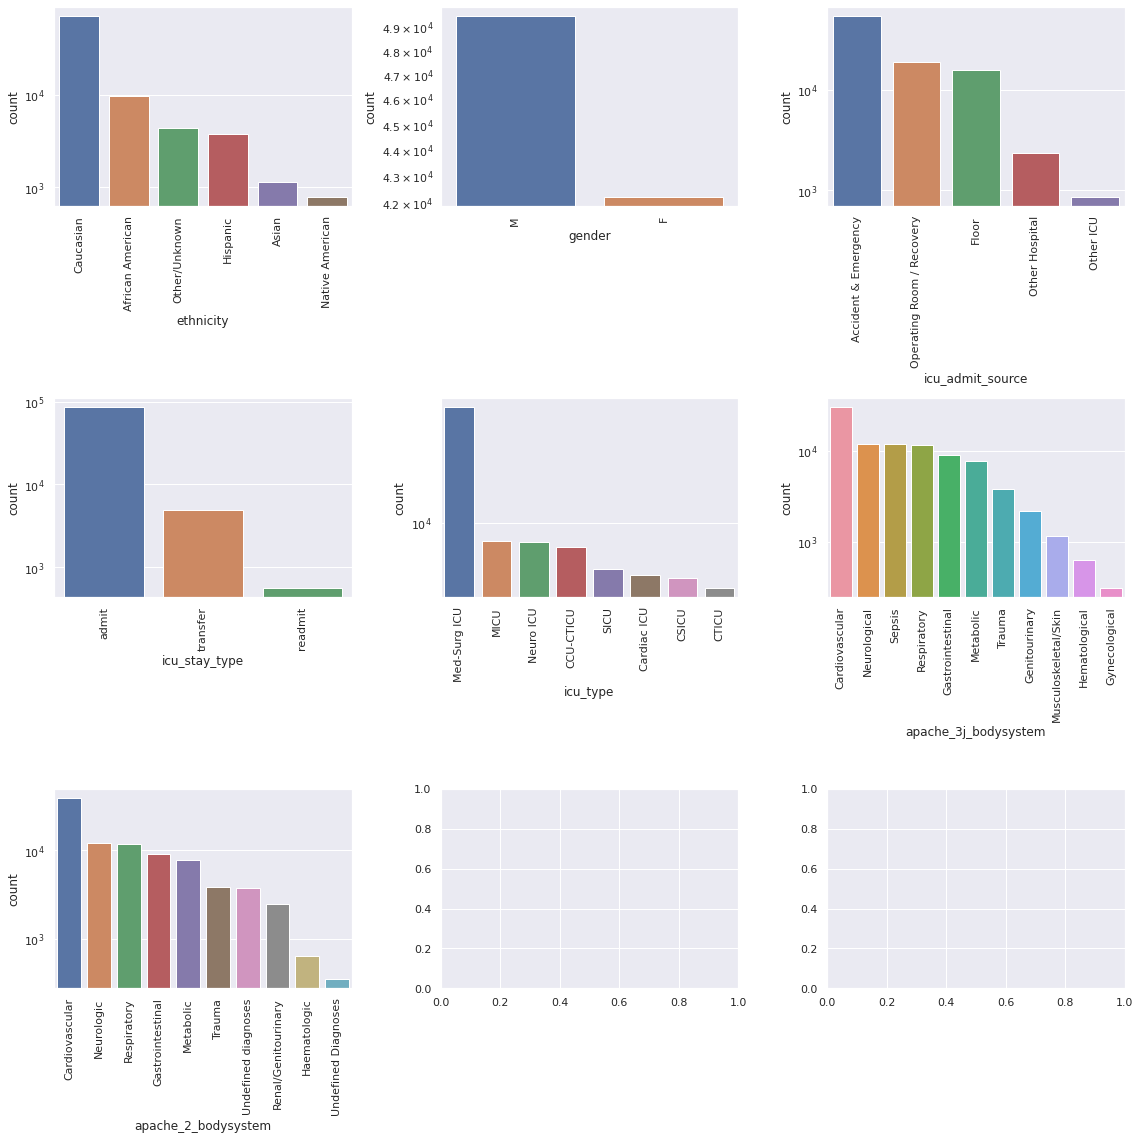

In [ ]:
sns.set(style="darkgrid")
rows, cols = 3, 3
fig, axs = plt.subplots(rows, cols, figsize=(16, 16))
cont = 0
for row in range(rows):
    for col in range(cols):
        df_col = stringCols.columns[cont]
        g = sns.countplot(data=stringCols, x=df_col, ax=axs[row, col], order=stringCols[df_col].value_counts().index) 
        xticks = g.get_xticklabels()
        g.set_xticklabels(xticks, rotation=90)
        g.set_yscale('log')
        cont += 1
        if cont==len(stringCols.columns.values):
          break

fig.tight_layout()
plt.show()

## Encoding

In [ ]:
patientDS['gender'] = patientDS['gender'].replace(['M', 'F'], [0, 1])

In [ ]:
stringCols = stringCols.drop('gender', axis=1)
for i, col in enumerate(stringCols):
    y = pd.get_dummies(patientDS[col], prefix=col)
    patientDS2 = patientDS.join(y)
    patientDS = patientDS2.drop(col, axis=1)

In [ ]:
patientDS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Columns: 117 entries, hospital_id to apache_2_bodysystem_Undefined diagnoses
dtypes: float64(69), int64(5), uint8(43)
memory usage: 55.5 MB


In [ ]:
patientDS.columns = patientDS.columns.str.replace('apache_2_bodysystem', 'ap2_bs')
patientDS.columns = patientDS.columns.str.replace('apache_3j_bodysystem', 'ap3j_bs')
patientDS.columns = patientDS.columns.str.replace('icu_admit_source', 'icu_as')
patientDS.columns = patientDS.columns.str.replace('ethnicity', 'eth')

# Analisis de features numéricas

In [ ]:
patientDS.columns[list(patientDS.nunique()==2)]

Index(['elective_surgery', 'gender', 'apache_post_operative', 'arf_apache',
       'gcs_unable_apache', 'intubated_apache', 'ventilated_apache', 'aids',
       'cirrhosis', 'diabetes_mellitus', 'hepatic_failure',
       'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'hospital_death', 'eth_African American',
       'eth_Asian', 'eth_Caucasian', 'eth_Hispanic', 'eth_Native American',
       'eth_Other/Unknown', 'icu_as_Accident & Emergency', 'icu_as_Floor',
       'icu_as_Operating Room / Recovery', 'icu_as_Other Hospital',
       'icu_as_Other ICU', 'icu_stay_type_admit', 'icu_stay_type_readmit',
       'icu_stay_type_transfer', 'icu_type_CCU-CTICU', 'icu_type_CSICU',
       'icu_type_CTICU', 'icu_type_Cardiac ICU', 'icu_type_MICU',
       'icu_type_Med-Surg ICU', 'icu_type_Neuro ICU', 'icu_type_SICU',
       'ap3j_bs_Cardiovascular', 'ap3j_bs_Gastrointestinal',
       'ap3j_bs_Genitourinary', 'ap3j_bs_Gynecological',
       'ap3j_bs_Hematological', '

In [ ]:
cols = patientDS.columns[list(patientDS.nunique()==2)]
numericCols_binary = patientDS[cols]
print(len(numericCols_binary.columns.values))
cols = patientDS.columns[list(patientDS.nunique()>2)]
numericCols_multiclass = patientDS[cols]
print(len(numericCols_multiclass.columns.values))

59
58


## Variables binarias

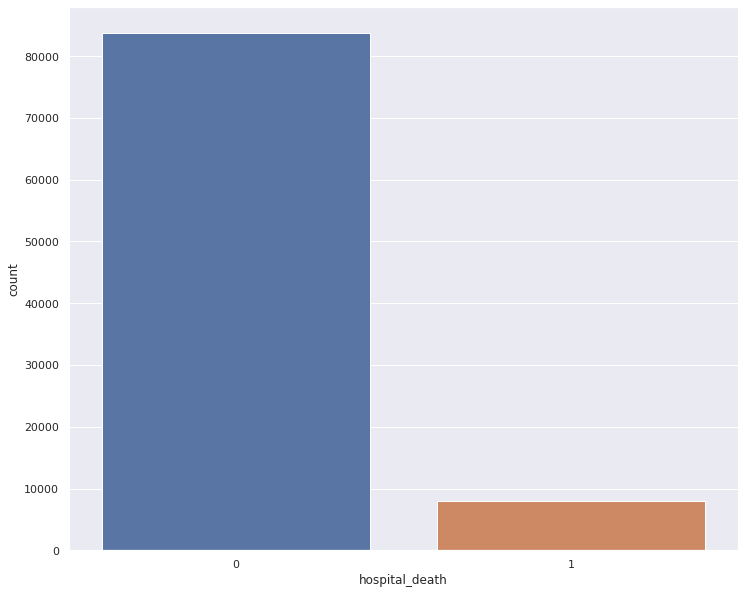

In [ ]:
fig, axs = plt.subplots(1, figsize=(12, 10))
sns.countplot(data=patientDS, x='hospital_death')

In [ ]:
np.bincount(np.array(patientDS.hospital_death).astype(int))

array([83798,  7915])

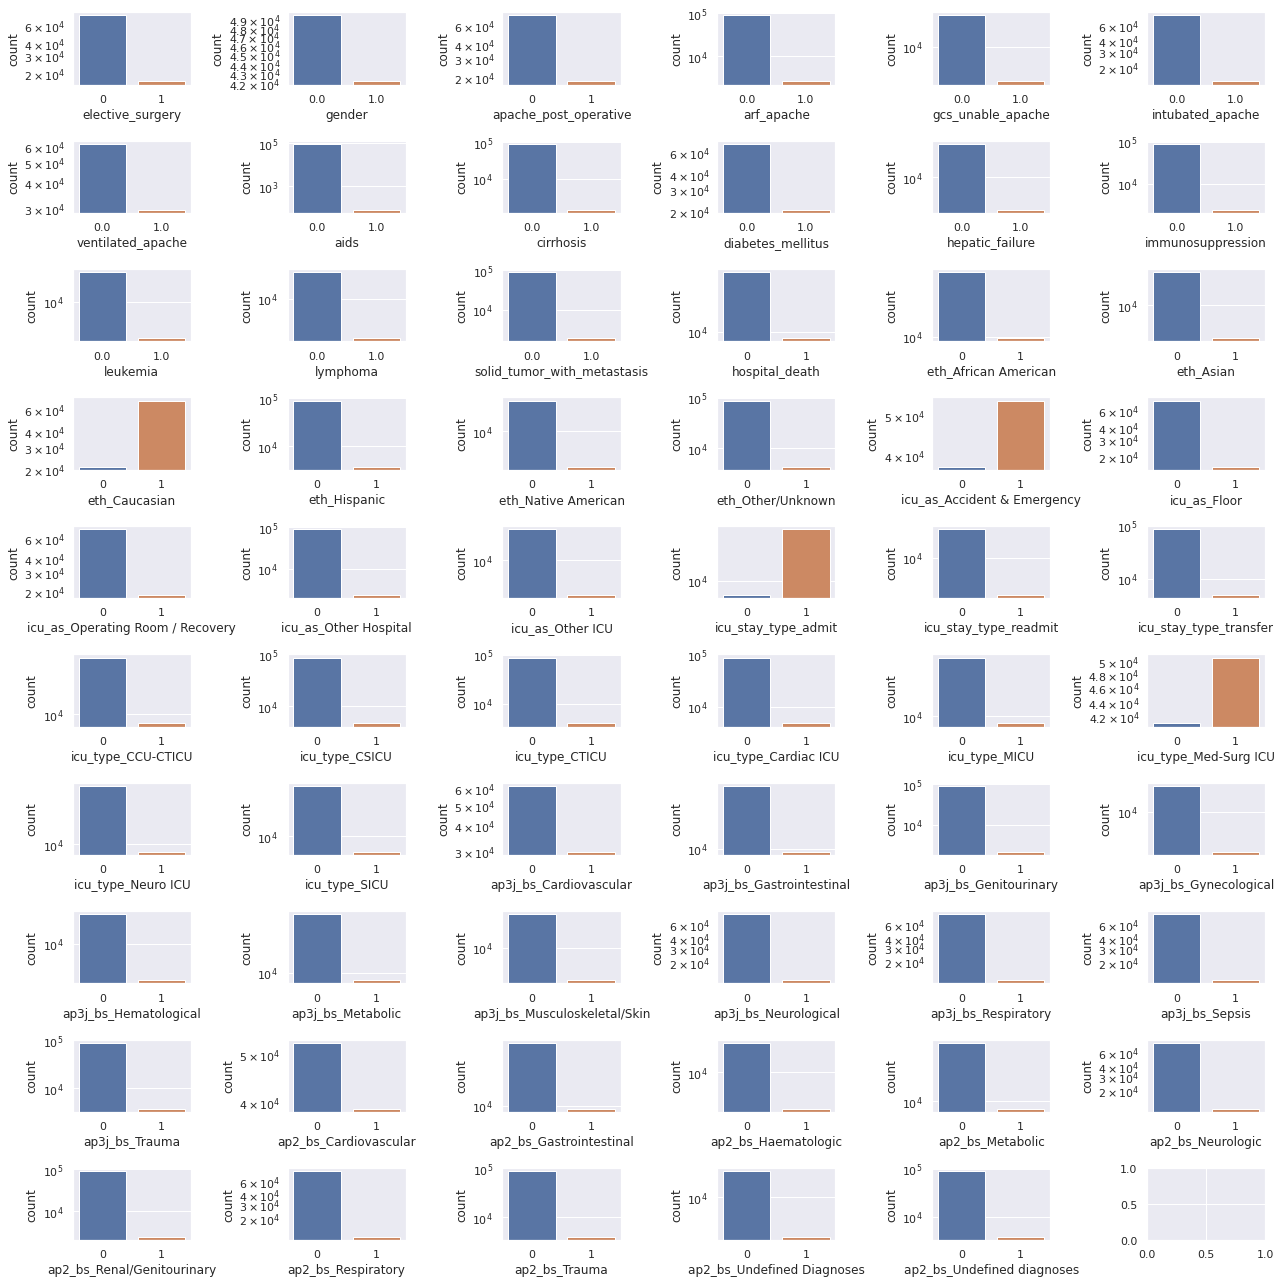

In [ ]:
sns.set(style="darkgrid")
rows, cols = 10, 6
fig, axs = plt.subplots(rows, cols, figsize=(18, 18))
cont = 0
for row in range(rows):
    for col in range(cols):
      df_col = numericCols_binary.columns[cont]
      if numericCols_binary[df_col].nunique()==2:
        g = sns.countplot(data=numericCols_binary, x=df_col, ax=axs[row, col])
        g.set_yscale('log')
        cont += 1
        if cont==len(numericCols_binary.columns.values):
          break

fig.tight_layout()
plt.show()

## Variables multiclase

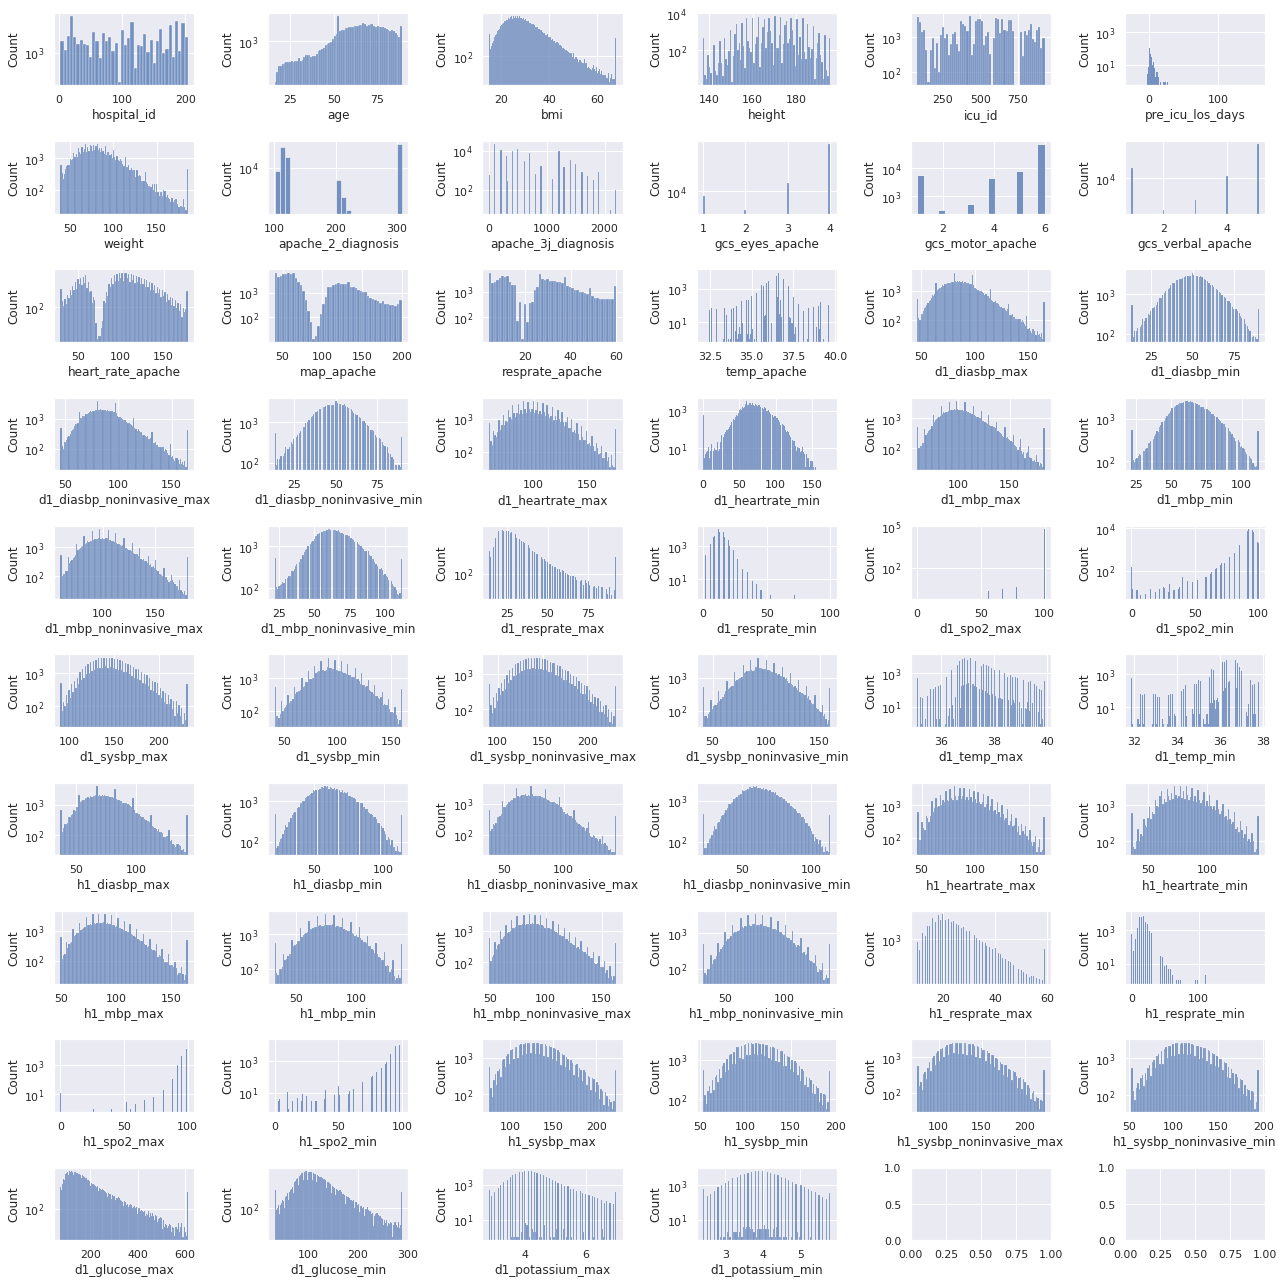

In [ ]:
sns.set(style="darkgrid")
rows, cols = 10, 6
fig, axs = plt.subplots(rows, cols, figsize=(18, 18))
cont = 0
for row in range(rows):
    for col in range(cols):
      df_col = numericCols_multiclass.columns[cont]
      if numericCols_multiclass[df_col].nunique()>2:
        g = sns.histplot(data=numericCols_multiclass, x=df_col, ax=axs[row, col])
        g.set_yscale('log')
        cont += 1
      if cont==len(numericCols_multiclass.columns.values):
        break
fig.tight_layout()
plt.show()

In [ ]:
print(numericCols_multiclass["h1_spo2_max"].nunique())

72


# Estudio de outliers

In [ ]:
def outlier_diagnostic_plots(df, variable):
    fig,axes = plt.subplots(1,3,figsize=(20,4))

    sns.histplot(df[variable], bins=30,ax=axes[0], kde=True)
    axes[0].set_title('Histograma')
    
    stats.probplot(df[variable], dist="norm", plot=axes[1])
    axes[1].set_title('QQ')
    
    # boxplot    
    sns.boxplot(y=df[variable],ax=axes[2])
    axes[2].set_title('Box&Whiskers')

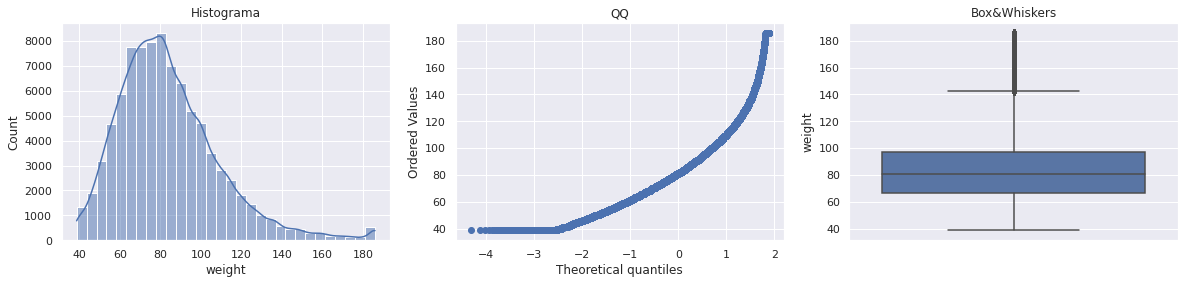

In [ ]:
outlier_diagnostic_plots(patientDS, 'weight')

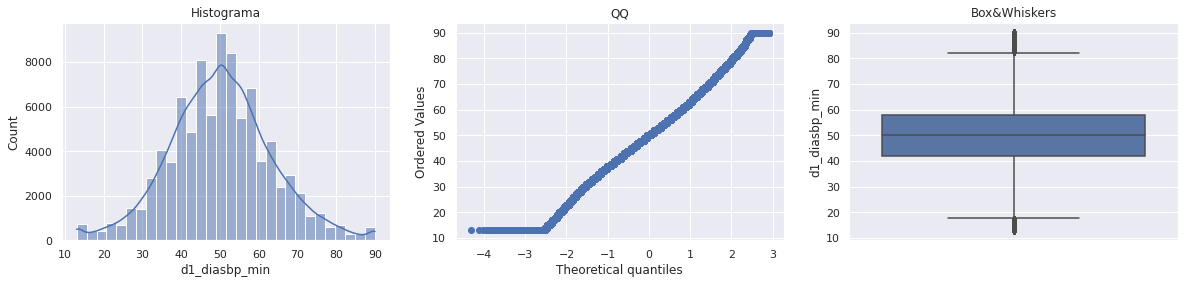

In [ ]:
outlier_diagnostic_plots(patientDS, 'd1_diasbp_min')

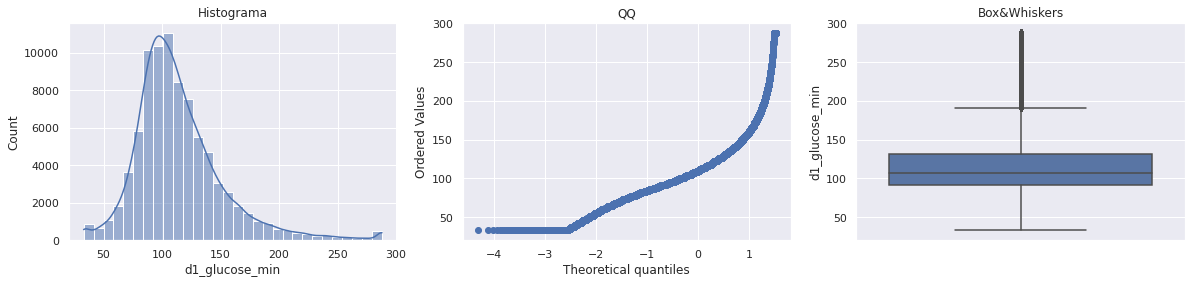

In [ ]:
outlier_diagnostic_plots(patientDS, 'd1_glucose_min')

Tanto en los QQ-plot como en los histogramas se observa que los datos han sido "capeados" (recortados). 
Conclusión: el dataset ya cuenta con el tratamiento de outliers de origen.

# Relaciones entre features - Matrices de correlacion

In [ ]:
df_skew = patientDS.skew()
print(df_skew)

hospital_id                   -0.045683
age                           -0.624474
bmi                            1.440833
elective_surgery               1.633330
gender                         0.158644
                                ...    
ap2_bs_Renal/Genitourinary     5.857507
ap2_bs_Respiratory             2.246164
ap2_bs_Trauma                  4.573354
ap2_bs_Undefined Diagnoses    16.188849
ap2_bs_Undefined diagnoses     4.624231
Length: 117, dtype: float64


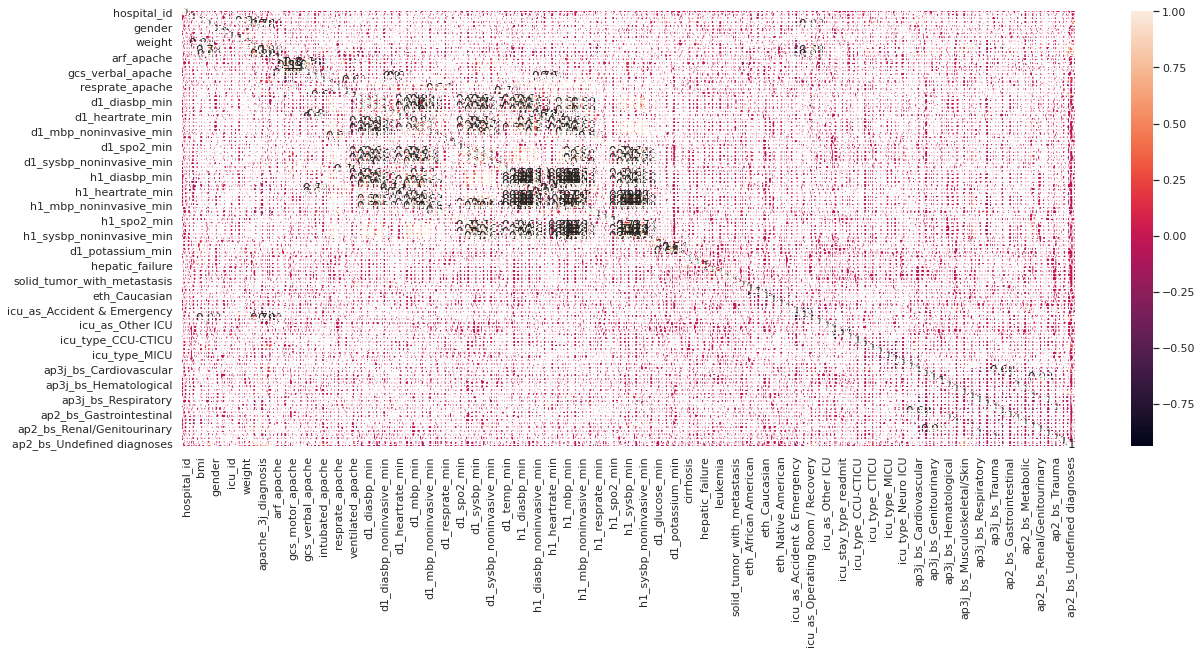

In [ ]:
# Matriz de correlación, redondeo a 2 decimales
correlation_matrix = patientDS.corr().round(2)
fig,axes = plt.subplots(1,1,figsize=(20,8))
sns.heatmap(data=correlation_matrix, annot=True, ax=axes);

In [ ]:
correlation_matrix = numericCols_multiclass.join(patientDS.hospital_death).corr('kendall').round(2)

In [ ]:
np.where(correlation_matrix.hospital_death.abs()>0.4)

(array([58]),)

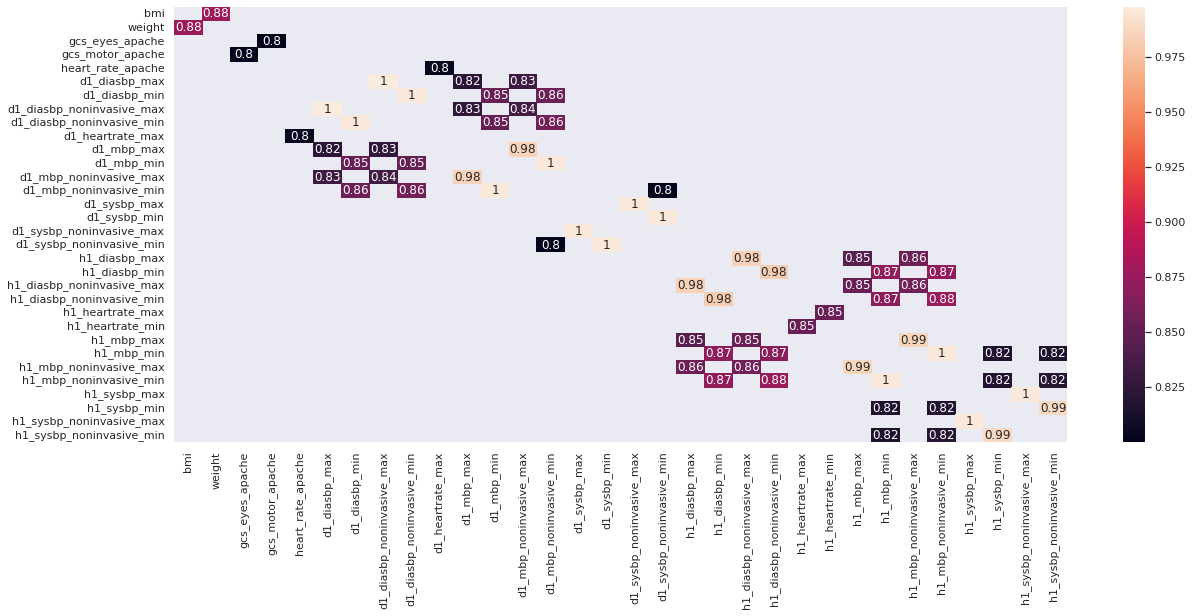

In [ ]:
dfCorr = numericCols_multiclass.corr()
filteredDf = dfCorr[((dfCorr >= .8) | (dfCorr <= -.8)) & (dfCorr !=1.000)]
filteredDf.dropna(axis=0, how='all', thresh=None, subset=None, inplace=False).dropna(axis=1, how='all', thresh=None, subset=None, inplace=False)
plt.figure(figsize=(20,8))
sns.heatmap(filteredDf.dropna(axis=0, how='all', thresh=None, subset=None, inplace=False).dropna(axis=1, how='all', thresh=None, subset=None, inplace=False), annot=True)

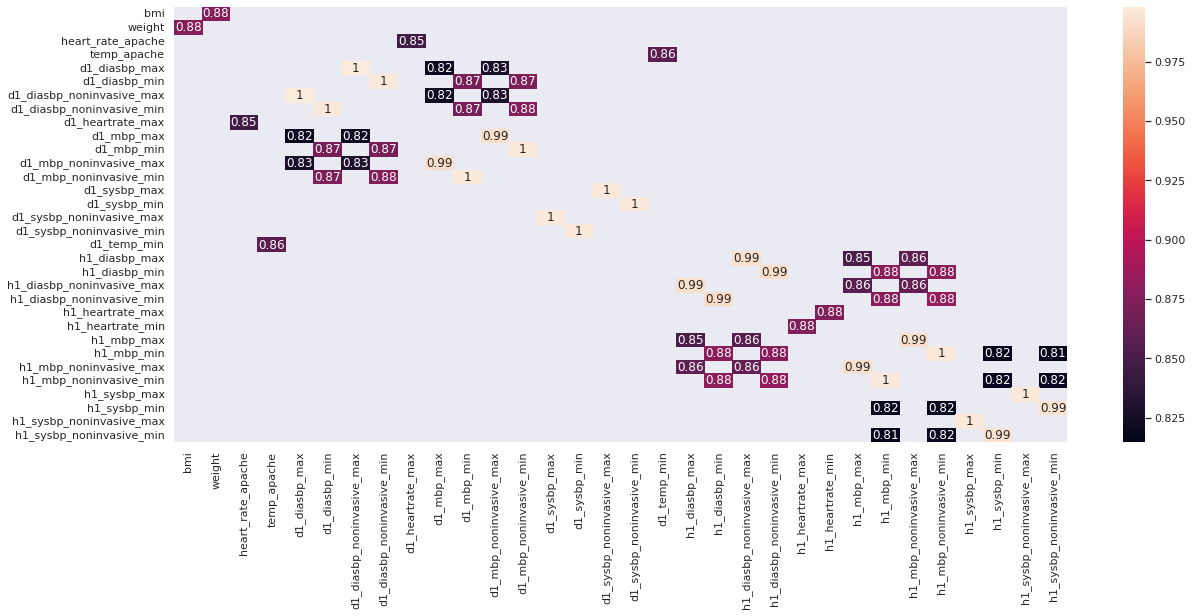

In [ ]:
dfCorr = numericCols_multiclass.corr("spearman")
filteredDf = dfCorr[((dfCorr >= .8) | (dfCorr <= -.8)) & (dfCorr !=1.000)]
filteredDf.dropna(axis=0, how='all', thresh=None, subset=None, inplace=False).dropna(axis=1, how='all', thresh=None, subset=None, inplace=False)
plt.figure(figsize=(20,8))
sns.heatmap(filteredDf.dropna(axis=0, how='all', thresh=None, subset=None, inplace=False).dropna(axis=1, how='all', thresh=None, subset=None, inplace=False), annot=True)

In [ ]:
s = filteredDf.abs().unstack() #filteredDf
so = s.sort_values(kind="quicksort", ascending=False).drop_duplicates()
#print(so)
vars=so.loc[(so<1) & (so>0.79), :] 


In [ ]:
vars

d1_diasbp_max              d1_diasbp_noninvasive_max    0.998015
d1_diasbp_min              d1_diasbp_noninvasive_min    0.996878
d1_sysbp_noninvasive_min   d1_sysbp_min                 0.996811
d1_sysbp_noninvasive_max   d1_sysbp_max                 0.996772
h1_mbp_noninvasive_min     h1_mbp_min                   0.996596
h1_sysbp_noninvasive_max   h1_sysbp_max                 0.996344
d1_mbp_min                 d1_mbp_noninvasive_min       0.996181
h1_sysbp_noninvasive_min   h1_sysbp_min                 0.993224
h1_diasbp_noninvasive_max  h1_diasbp_max                0.992543
h1_mbp_max                 h1_mbp_noninvasive_max       0.992494
d1_mbp_max                 d1_mbp_noninvasive_max       0.992206
h1_diasbp_noninvasive_min  h1_diasbp_min                0.990927
                           h1_mbp_noninvasive_min       0.882993
h1_diasbp_min              h1_mbp_noninvasive_min       0.880160
h1_mbp_min                 h1_diasbp_min                0.879151
                         

In [ ]:
patientDS2=patientDS.copy()

In [ ]:
dfTest=vars.rename("example").to_frame()
for correlation in dfTest.iterrows():
  #print(correlation)
  #print(correlation[0])
  if(correlation[0][0] in patientDS2.columns and correlation[0][1] in patientDS2.columns):
    if(filteredDf[correlation[0][0]].isna().sum()>=filteredDf[correlation[0][1]].isna().sum()):
      patientDS2=patientDS2.drop(columns=[correlation[0][0]])
    else:
      patientDS2=patientDS2.drop(columns=[correlation[0][1]])
  #print(correlation.iloc[0].name,correlation.iloc[0].name.example)

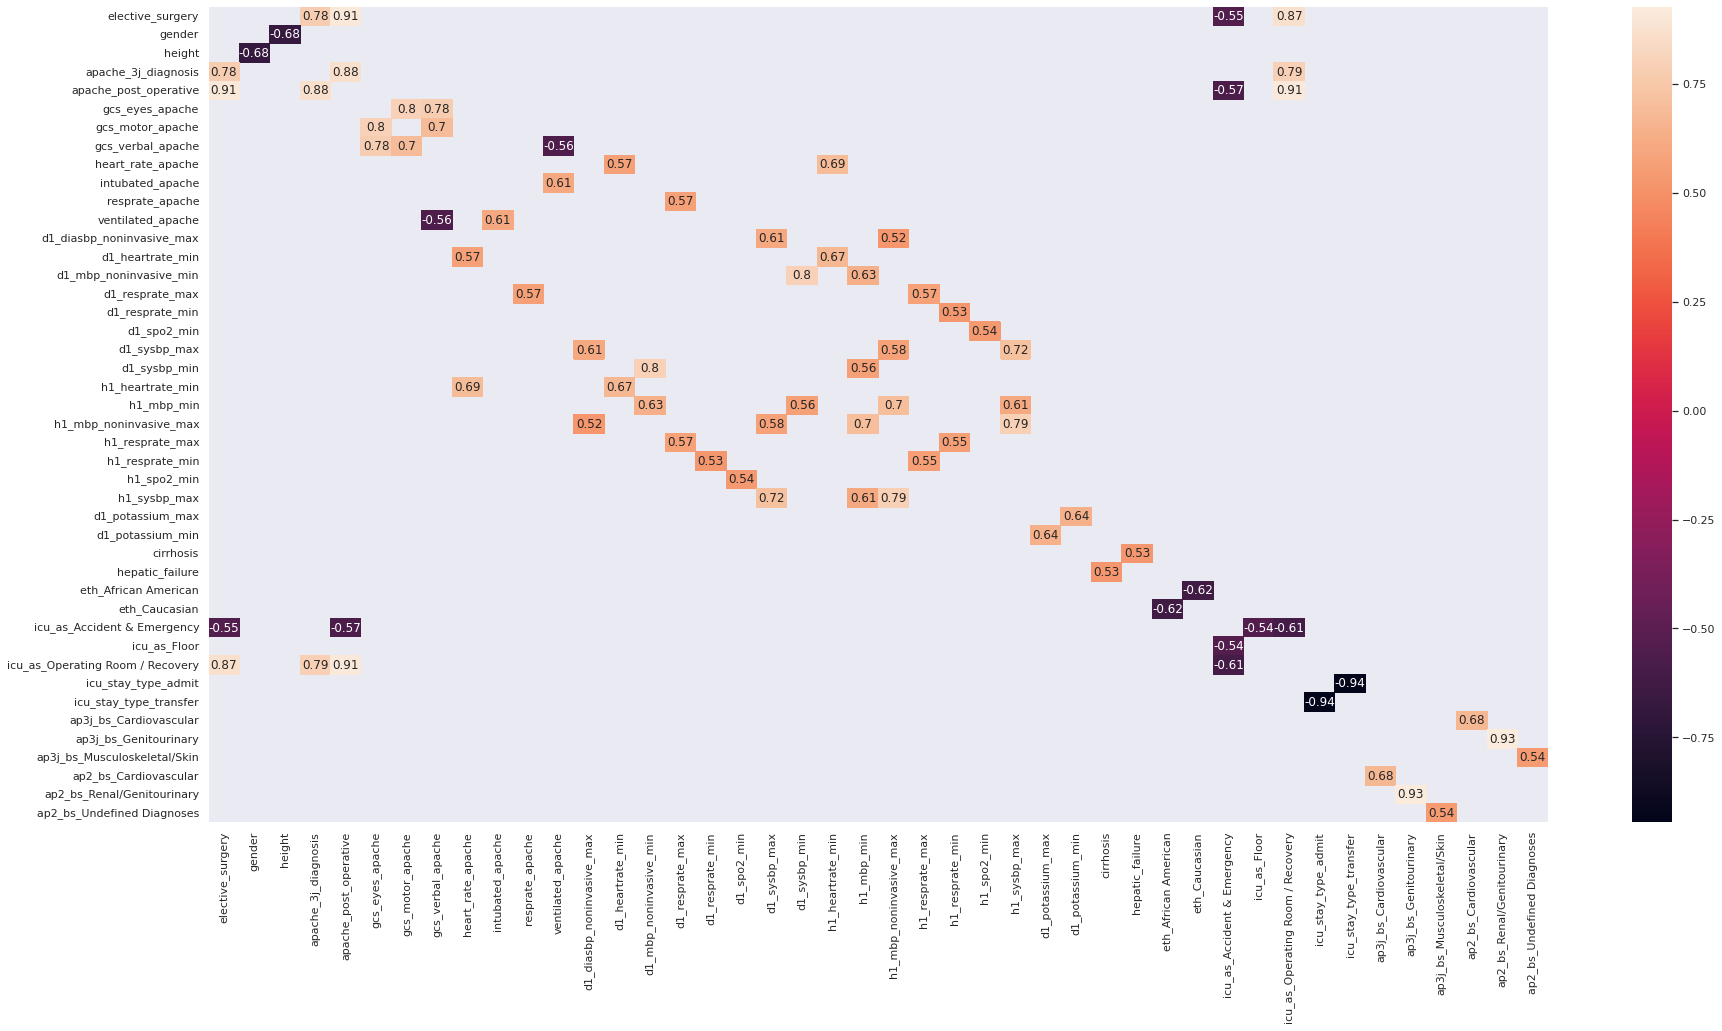

In [ ]:
dfCorr = patientDS2.corr()
filteredDf = dfCorr[((dfCorr >= .5) | (dfCorr <= -.5)) & (dfCorr !=1.000)]
filteredDf.dropna(axis=0, how='all', thresh=None, subset=None, inplace=False).dropna(axis=1, how='all', thresh=None, subset=None, inplace=False)
plt.figure(figsize=(30,15))
sns.heatmap(filteredDf.dropna(axis=0, how='all', thresh=None, subset=None, inplace=False).dropna(axis=1, how='all', thresh=None, subset=None, inplace=False), annot=True)

In [ ]:
dfCorr = patientDS2.corr("kendall")
a=list(dfCorr.columns)
a.remove('hospital_death')
yCorr=dfCorr.drop(columns=a)
columnsWithLowCorr=np.array((abs(yCorr)<0.01)).flatten()
print(patientDS2.columns[np.array(columnsWithLowCorr)])

#for col in patientDS2.columns[np.array(columnsWithLowCorr)]:
#    patientDS2=patientDS2.drop(columns=[col])

Index(['hospital_id', 'gender', 'icu_id', 'd1_diasbp_noninvasive_max',
       'd1_temp_max', 'h1_spo2_max', 'd1_potassium_min', 'aids',
       'eth_African American', 'eth_Asian', 'eth_Caucasian', 'eth_Hispanic',
       'eth_Native American', 'eth_Other/Unknown',
       'icu_as_Accident & Emergency', 'icu_stay_type_readmit',
       'icu_type_Med-Surg ICU', 'icu_type_Neuro ICU', 'icu_type_SICU',
       'ap3j_bs_Hematological', 'ap2_bs_Haematologic',
       'ap2_bs_Undefined Diagnoses'],
      dtype='object')


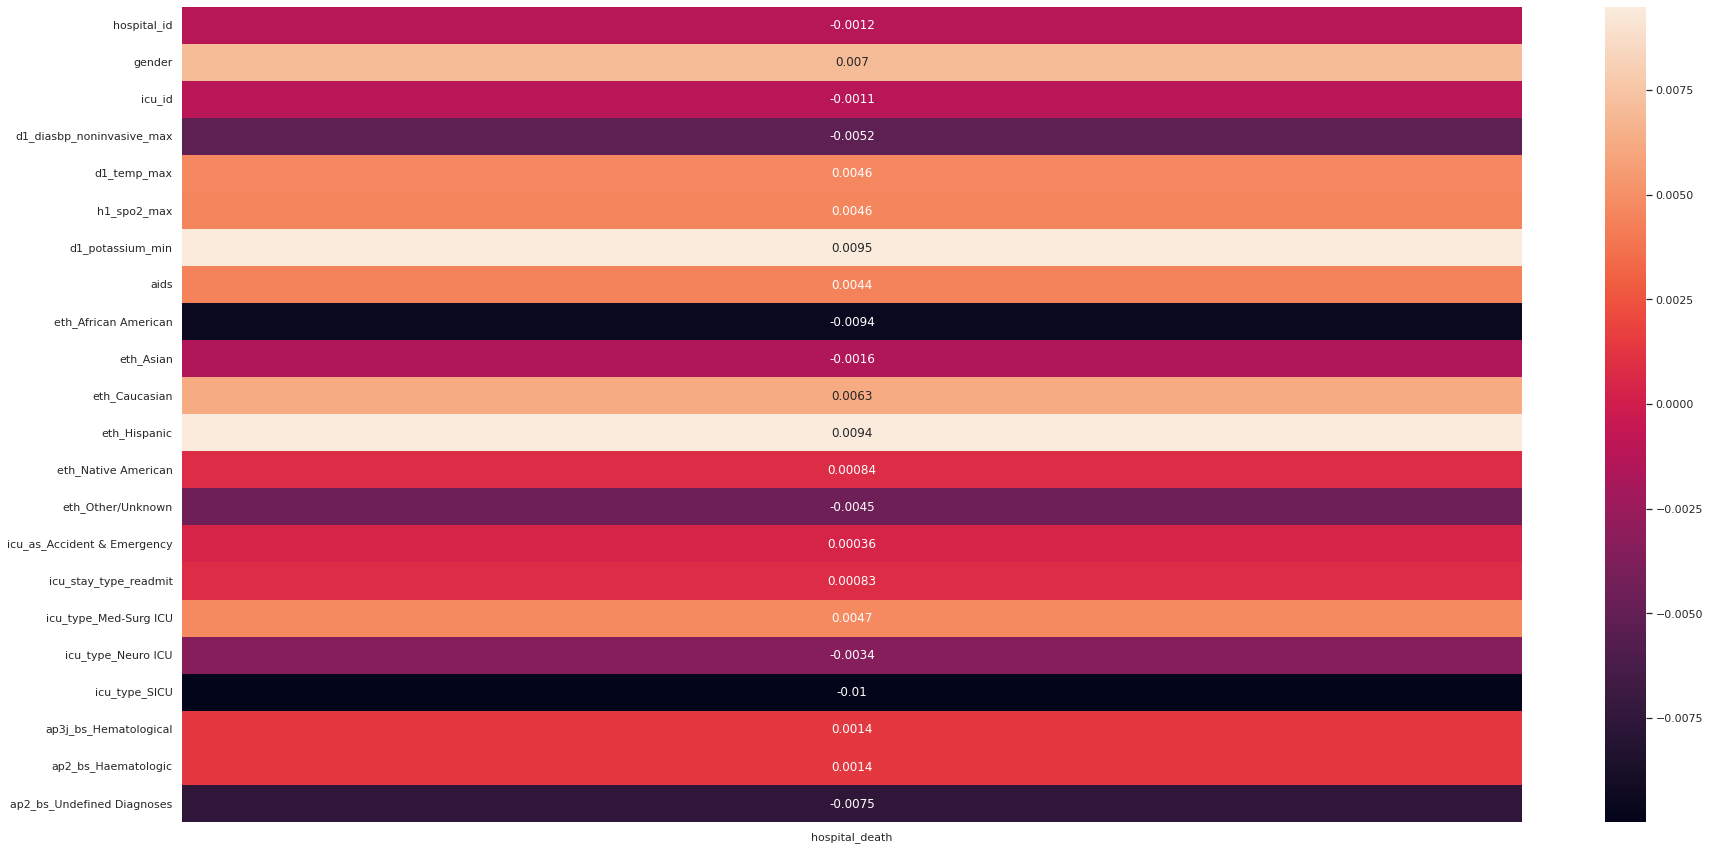

In [ ]:
plt.figure(figsize=(30,15))
sns.heatmap(yCorr[abs(yCorr)<0.01].dropna(axis=0, how='all', thresh=None, subset=None, inplace=False).dropna(axis=1, how='all', thresh=None, subset=None, inplace=False), annot=True)

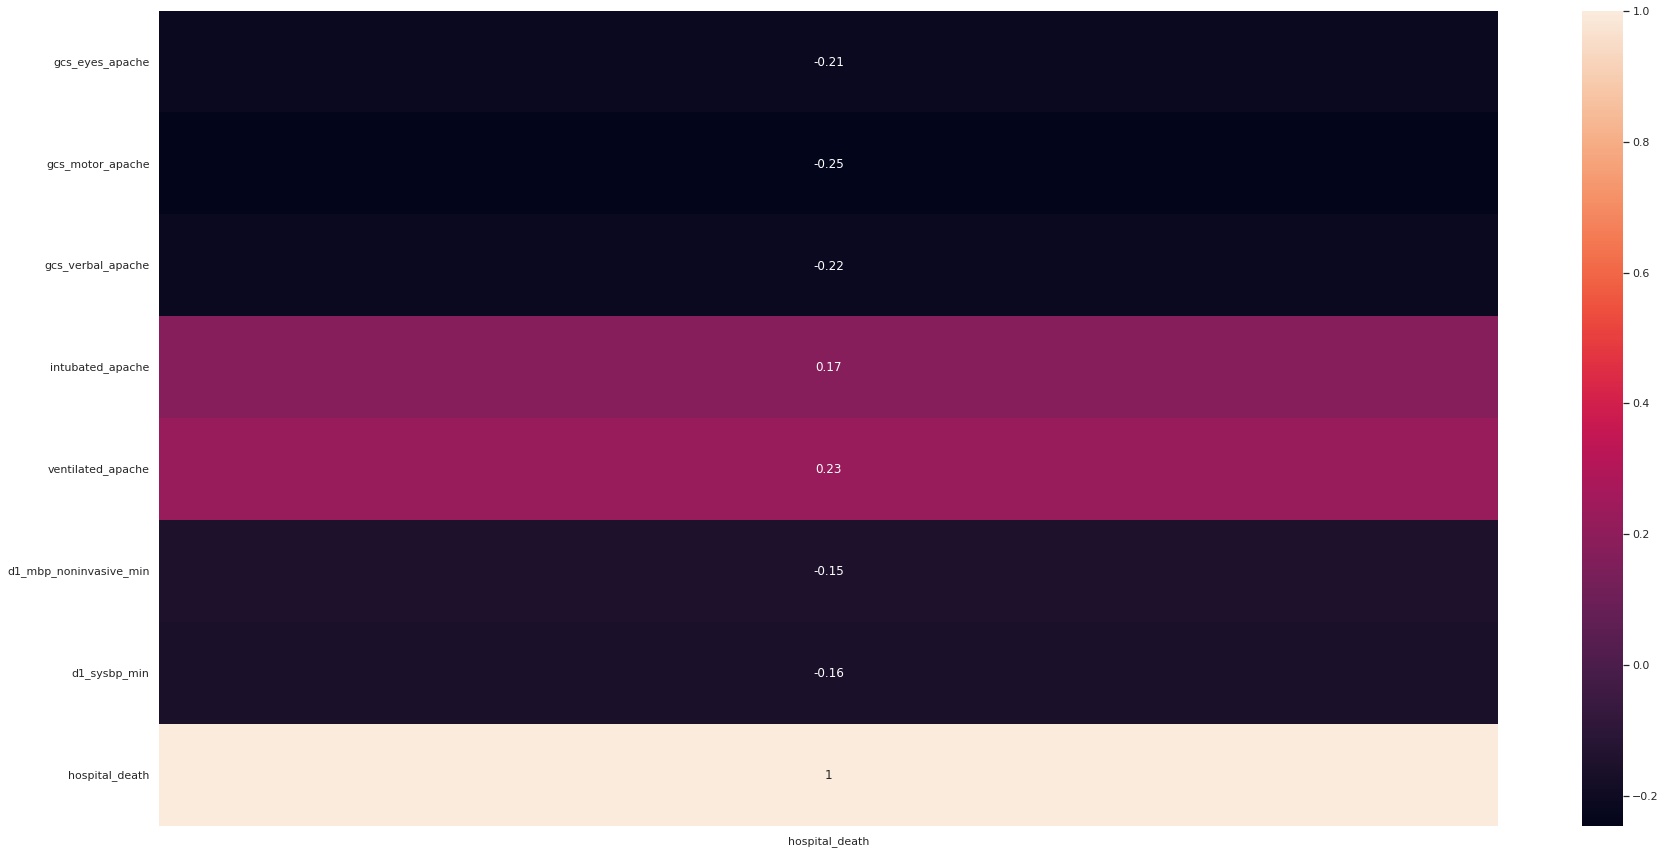

In [ ]:
plt.figure(figsize=(30,15))
sns.heatmap(yCorr[abs(yCorr)>0.15].dropna(axis=0, how='all', thresh=None, subset=None, inplace=False).dropna(axis=1, how='all', thresh=None, subset=None, inplace=False), annot=True)

In [ ]:
for col in patientDS2.columns[np.array(columnsWithLowCorr)]:
    patientDS2=patientDS2.drop(columns=[col])

# Analisis de datos faltantes - Imputación

## Imputación estadística con moda (para variables binarias)

In [ ]:
nulls = patientDS.isnull().sum().sort_values(axis=0, ascending=False)/patientDS.shape[0]*100
print(nulls[nulls>0])

d1_potassium_min             10.451081
d1_potassium_max             10.451081
h1_mbp_noninvasive_max        9.904812
h1_mbp_noninvasive_min        9.904812
h1_diasbp_noninvasive_min     8.014131
                               ...    
d1_sysbp_max                  0.173367
d1_sysbp_min                  0.173367
d1_heartrate_min              0.158102
d1_heartrate_max              0.158102
gender                        0.027259
Length: 68, dtype: float64


In [ ]:
nans_bin_cols = patientDS.loc[:, list(patientDS.nunique()==2)].columns
len(nans_bin_cols)

59

In [ ]:
imputer = SimpleImputer(strategy='most_frequent')
patientDS[nans_bin_cols] = imputer.fit_transform(patientDS[nans_bin_cols])

In [ ]:
print(patientDS['gender'].sum())
print(patientDS['gender'].value_counts())

42219.0
0.0    49494
1.0    42219
Name: gender, dtype: int64


## Imputación estadística con promedio (para variables continuas con hasta 1% de nans)

In [ ]:
nulls = patientDS.isnull().sum().sort_values(axis=0, ascending=False)/patientDS.shape[0]*100
print(nulls[nulls>0])

d1_potassium_min             10.451081
d1_potassium_max             10.451081
h1_mbp_noninvasive_max        9.904812
h1_mbp_noninvasive_min        9.904812
h1_diasbp_noninvasive_min     8.014131
h1_diasbp_noninvasive_max     8.014131
h1_sysbp_noninvasive_max      8.004318
h1_sysbp_noninvasive_min      8.004318
d1_glucose_min                6.331709
d1_glucose_max                6.331709
h1_mbp_min                    5.058171
h1_mbp_max                    5.058171
h1_resprate_min               4.750690
h1_resprate_max               4.750690
age                           4.610033
h1_spo2_min                   4.563148
h1_spo2_max                   4.563148
temp_apache                   4.479191
h1_diasbp_min                 3.946005
h1_diasbp_max                 3.946005
h1_sysbp_max                  3.937283
h1_sysbp_min                  3.937283
bmi                           3.738837
h1_heartrate_min              3.042099
h1_heartrate_max              3.042099
weight                   

In [ ]:
nans_1pc_notbin_cols = nulls[(nulls>0) & (nulls<1)]
print(nans_1pc_notbin_cols)

heart_rate_apache    0.957334
d1_resprate_min      0.419788
d1_resprate_max      0.419788
d1_spo2_max          0.363089
d1_spo2_min          0.363089
d1_mbp_max           0.239879
d1_mbp_min           0.239879
d1_diasbp_min        0.179909
d1_diasbp_max        0.179909
d1_sysbp_max         0.173367
d1_sysbp_min         0.173367
d1_heartrate_min     0.158102
d1_heartrate_max     0.158102
dtype: float64


In [ ]:
imputer = SimpleImputer(strategy='mean')
li = list(nans_1pc_notbin_cols.keys())
patientDS[li] = imputer.fit_transform(patientDS[li])

##Imputacion con MICE (para variables continuas con más de 1% de nans)

In [ ]:
nulls = patientDS.isnull().sum().sort_values(axis=0, ascending=False)/patientDS.shape[0]*100
print(nulls[nulls>0])
print(len(nulls[nulls>0]))

d1_potassium_min             10.451081
d1_potassium_max             10.451081
h1_mbp_noninvasive_min        9.904812
h1_mbp_noninvasive_max        9.904812
h1_diasbp_noninvasive_max     8.014131
h1_diasbp_noninvasive_min     8.014131
h1_sysbp_noninvasive_min      8.004318
h1_sysbp_noninvasive_max      8.004318
d1_glucose_min                6.331709
d1_glucose_max                6.331709
h1_mbp_max                    5.058171
h1_mbp_min                    5.058171
h1_resprate_min               4.750690
h1_resprate_max               4.750690
age                           4.610033
h1_spo2_min                   4.563148
h1_spo2_max                   4.563148
temp_apache                   4.479191
h1_diasbp_min                 3.946005
h1_diasbp_max                 3.946005
h1_sysbp_max                  3.937283
h1_sysbp_min                  3.937283
bmi                           3.738837
h1_heartrate_max              3.042099
h1_heartrate_min              3.042099
weight                   

In [ ]:
vars = nulls[nulls>0].keys()

In [ ]:
categoric=["gcs_unable_apache","arf_apache","gcs_eyes_apache","gcs_motor_apache","gcs_verbal_apache","intubated_apache","ventilated_apache","aids","cirrhosis","diabetes_mellitus","hepatic_failure","immunosuppression","leukemia","lymphoma","solid_tumor_with_metastasis","gcs_unable_apache"]
categoricCOlumnNumbers=[]
categoricCOlumnNames=[]
for i in np.sort(categoric):
  try:
    categoricCOlumnNumbers.append(patientDS2.columns.get_loc(i))
    categoricCOlumnNames.append(i)
  except:
    3

print(np.sort(categoricCOlumnNumbers))


[ 8  9 10 11 11 12 14 17 37 38 39 40 41 42 43]


In [ ]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

In [ ]:
from imblearn.over_sampling import RandomOverSampler

scaler = StandardScaler()




Xs=patientDS2.drop(columns=["hospital_death"])


scaler.fit(Xs)


Ys=patientDS2["hospital_death"]


In [ ]:
Xs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 73 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   age                               87485 non-null  float64
 1   bmi                               88284 non-null  float64
 2   elective_surgery                  91713 non-null  int64  
 3   height                            90379 non-null  float64
 4   pre_icu_los_days                  91713 non-null  float64
 5   apache_2_diagnosis                90051 non-null  float64
 6   apache_3j_diagnosis               90612 non-null  float64
 7   apache_post_operative             91713 non-null  int64  
 8   arf_apache                        90998 non-null  float64
 9   gcs_eyes_apache                   89812 non-null  float64
 10  gcs_motor_apache                  89812 non-null  float64
 11  gcs_unable_apache                 90676 non-null  float64
 12  gcs_

In [ ]:


linearR = LinearRegression()
logisticR = LogisticRegression()

imp = IterativeImputer(n_nearest_features=4,estimator=logisticR,missing_values=np.nan, max_iter=10, verbose=2, imputation_order='roman',random_state=0)
Xs[categoricCOlumnNames]=imp.fit_transform(Xs[categoricCOlumnNames])

[IterativeImputer] Completing matrix with shape (91713, 15)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[IterativeImputer] Ending imputation round 1/10, elapsed time 26.46
[IterativeImputer] Change: 2.9048324526805294, scaled tolerance: 0.006 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[IterativeImputer] Ending imputation round 2/10, elapsed time 52.31
[IterativeImputer] Change: 0.0, scaled tolerance: 0.006 
[IterativeImputer] Early stopping criterion reached.


In [ ]:
linearR = LinearRegression()
logisticR = LogisticRegression()

imp = IterativeImputer(n_nearest_features=4, estimator=linearR, missing_values=np.nan, max_iter=20, verbose=2, imputation_order='roman', random_state=0)
Xs=imp.fit_transform(Xs)

[IterativeImputer] Completing matrix with shape (91713, 73)
[IterativeImputer] Ending imputation round 1/20, elapsed time 1.41
[IterativeImputer] Change: 796.7144834400204, scaled tolerance: 2.2010500000000004 
[IterativeImputer] Ending imputation round 2/20, elapsed time 2.95
[IterativeImputer] Change: 306.85336649489426, scaled tolerance: 2.2010500000000004 
[IterativeImputer] Ending imputation round 3/20, elapsed time 4.32
[IterativeImputer] Change: 1112.456022651383, scaled tolerance: 2.2010500000000004 
[IterativeImputer] Ending imputation round 4/20, elapsed time 5.67
[IterativeImputer] Change: 359.4198301587569, scaled tolerance: 2.2010500000000004 
[IterativeImputer] Ending imputation round 5/20, elapsed time 7.27
[IterativeImputer] Change: 385.9915053515849, scaled tolerance: 2.2010500000000004 
[IterativeImputer] Ending imputation round 6/20, elapsed time 8.75
[IterativeImputer] Change: 576.6678904007713, scaled tolerance: 2.2010500000000004 
[IterativeImputer] Ending imputat

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


# Escalado

#Dividir Dataset

In [ ]:
ros = RandomOverSampler(random_state=0)

Xsbefore=Xs.copy()


Xs=scaler.transform(Xs)


X_train, X_test, y_train, y_test =train_test_split( Xs, Ys, test_size=0.2, random_state=42, stratify=patientDS2.hospital_death)

X_train, y_train = ros.fit_resample(X_train, y_train)



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


---
---
# **MODELOS**

In [ ]:
#https://www.kaggle.com/code/rsesha/fraud-detection-96-accuracy-very-easy
#Esta funcion nos permite ver la precision y el recall de manera muy rapido
def print_accuracy(modeltype, y_test, y_preds):
    target="isFraud"
    if modeltype == 'Regression':
        from sklearn.metrics import r2_score, mean_squared_error
        print('R-Squared = %0.0f%%' %(100*r2_score(y_test,y_preds)))
        print('RMSE = %0.2f' %np.sqrt(mean_squared_error(y_test,y_preds)))
    else:
        from sklearn.metrics import balanced_accuracy_score, classification_report
        if isinstance(target, str): 
            print('Bal accu %0.0f%%' %(100*balanced_accuracy_score(y_test,y_preds)))
            print(classification_report(y_test,y_preds))
        elif len(target) == 1:
                print('Bal accu %0.0f%%' %(100*balanced_accuracy_score(y_test,y_preds)))
                print(classification_report(y_test,y_preds))
        else:
            for each_i, target_name in enumerate(target):
                print('For %s:' %target_name)
                print('    Bal accu %0.0f%%' %(100*balanced_accuracy_score(y_test.values[:,each_i],y_preds[:,each_i])))
                print(classification_report(y_test.values[:,each_i],y_preds[:,each_i]))

## Regresión logística

In [ ]:

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.796052990241509

In [ ]:
y_pred = clf.predict(X_test)
print_accuracy(None,y_test,y_pred)

Bal accu 78%
              precision    recall  f1-score   support

           0       0.97      0.80      0.88     16760
           1       0.27      0.77      0.39      1583

    accuracy                           0.80     18343
   macro avg       0.62      0.78      0.64     18343
weighted avg       0.91      0.80      0.84     18343



## Arboles de decisión

In [ ]:
model = tree.DecisionTreeClassifier(criterion='entropy')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print_accuracy(None, y_test, y_pred)


Bal accu 62%
              precision    recall  f1-score   support

           0       0.93      0.94      0.94     16760
           1       0.31      0.30      0.31      1583

    accuracy                           0.88     18343
   macro avg       0.62      0.62      0.62     18343
weighted avg       0.88      0.88      0.88     18343



In [ ]:

#spe = SelfPacedEnsembleClassifier(n_jobs= 20)
#spe.fit(X_train,y_train)
#y_preds = spe.predict(X_test)


#print_accuracy(None, y_test, y_preds)

## Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0,n_jobs=-1,n_estimators=100)

clf.fit(X_train,y_train)
y_preds = clf.predict(X_test)

print(clf.score(X_test,y_test))
print_accuracy(None, y_test, y_preds)


0.92487597448618
Bal accu 62%
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     16760
           1       0.68      0.25      0.36      1583

    accuracy                           0.92     18343
   macro avg       0.81      0.62      0.66     18343
weighted avg       0.91      0.92      0.91     18343



##XGBoost

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)
y_preds = model.predict(X_test)
print_accuracy(None, y_test, y_preds)
print(np.bincount(y_test+2*y_preds))


Bal accu 79%
              precision    recall  f1-score   support

           0       0.97      0.81      0.89     16760
           1       0.28      0.78      0.41      1583

    accuracy                           0.81     18343
   macro avg       0.63      0.79      0.65     18343
weighted avg       0.91      0.81      0.85     18343

[13614   355  3146  1228]


In [ ]:
print(np.bincount(y_test+2*y_preds)*1000/18343)

[742.19048138  19.35343183 171.50956768  66.94651911]


In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_preds = gnb.predict(X_test)

print(gnb.score(X_test,y_test))
print_accuracy(None, y_test, y_preds)

0.7325955405331734
Bal accu 75%
              precision    recall  f1-score   support

           0       0.97      0.73      0.83     16760
           1       0.21      0.78      0.33      1583

    accuracy                           0.73     18343
   macro avg       0.59      0.75      0.58     18343
weighted avg       0.91      0.73      0.79     18343



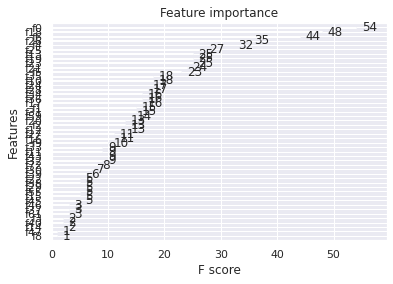

In [ ]:
from xgboost import plot_importance
plot_importance(model)

73
[45 43  4 13 55  5 39 21 36 18 31 59 15 26  0 19  6  9 20 12  2 23 25 10
 17]
['icu_as_Operating Room / Recovery' 'solid_tumor_with_metastasis'
 'pre_icu_los_days' 'heart_rate_apache' 'ap3j_bs_Cardiovascular'
 'apache_2_diagnosis' 'hepatic_failure' 'd1_resprate_min'
 'd1_potassium_max' 'd1_heartrate_min' 'h1_resprate_min'
 'ap3j_bs_Metabolic' 'map_apache' 'd1_temp_min' 'age'
 'd1_mbp_noninvasive_min' 'apache_3j_diagnosis' 'gcs_eyes_apache'
 'd1_resprate_max' 'gcs_verbal_apache' 'elective_surgery' 'd1_spo2_min'
 'd1_sysbp_min' 'gcs_motor_apache' 'ventilated_apache']
icu_as_Operating Room / Recovery 0.010686726
solid_tumor_with_metastasis 0.010827564
pre_icu_los_days 0.012987201
heart_rate_apache 0.013361712
ap3j_bs_Cardiovascular 0.013524492
apache_2_diagnosis 0.014469638
hepatic_failure 0.014532631
d1_resprate_min 0.0150775425
d1_potassium_max 0.015449719
d1_heartrate_min 0.015605575
h1_resprate_min 0.018973878
ap3j_bs_Metabolic 0.020582817
map_apache 0.021047724
d1_temp_min 0.02204

<BarContainer object of 25 artists>

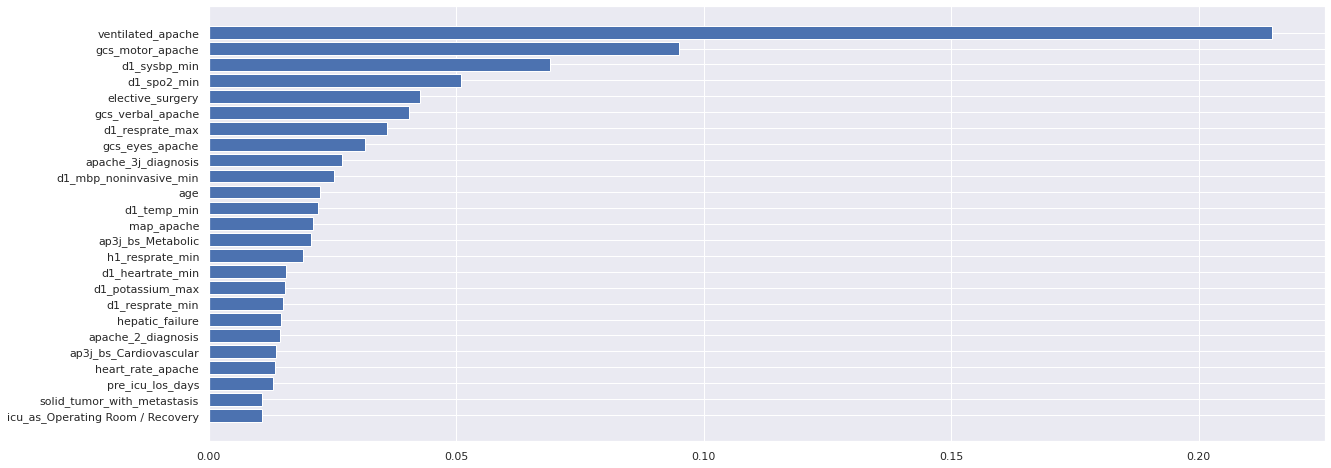

In [ ]:
print(len(model.feature_importances_))
columnNames=list(patientDS2.columns)
columnNames.remove("hospital_death")
len(columnNames)



features=np.argsort(model.feature_importances_)[-25:]
print(features)
plt.figure(figsize=(20,8))
print(np.array(columnNames)[features])
for i in features:
  print(columnNames[i],model.feature_importances_[i])

plt.barh(np.array(columnNames)[features], np.array(model.feature_importances_)[features])

## AutoML

In [ ]:
import pycaret
print('Using PyCaret Version', pycaret.__version__)
print('Path to PyCaret: ', pycaret.__file__)

ModuleNotFoundError: ignored

In [ ]:
import jinja2
from pycaret.classification import *

#clf1 = setup(data=data, 
#             target = 'hospital_death',                # Use your target variable.
##             session_id=123, 
#            log_experiment=True, 
#             experiment_name='experiment1',     # Use any experiment name.
#             silent=True                        # Runs the command without user input. 
#           )

patientDS3=Xsbefore.copy()
patientDS3["hospital_death"]=Ys

clf1 = setup(patientDS3, target = 'hospital_death', session_id=786,use_gpu=True)

In [ ]:
models()

In [ ]:
compare_models()

## Red neuronal con tensorflow
Fue realizado como simple experimentacion

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(134076, 73)
(134076,)
(18343, 73)
(18343,)


In [ ]:
X_train.shape[1]

73

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf


# Neural network
model = Sequential()
model.add(Dense(250, input_dim=X_train.shape[1], activation='relu'))
model.add(tf.keras.layers.Dropout(.2))

model.add(Dense(125,  activation='relu'))
model.add(tf.keras.layers.Dropout(.2))

model.add(Dense(250,  activation='relu'))
model.add(tf.keras.layers.Dropout(.2))

model.add(Dense(125,  activation='relu'))
model.add(tf.keras.layers.Dropout(.2))

model.add(Dense(60,  activation='relu'))
model.add(tf.keras.layers.Dropout(.2))

model.add(Dense(30, activation='relu'))
model.add(tf.keras.layers.Dropout(.2))

model.add(Dense(10, activation='relu'))
model.add(tf.keras.layers.Dropout(.2))

model.add(Dense(1,activation='sigmoid'))

In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices()) # list of DeviceAttributes


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11943398601871269022
xla_global_id: -1
]


In [ ]:

from keras.callbacks import EarlyStopping
opt = tf.keras.optimizers.SGD(learning_rate=0.0001)
print(tf.config.list_physical_devices('GPU'))
#print(tf.test.is_gpu_available(cuda_only=True) )


[]


In [ ]:
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
history = model.fit(X_train, y_train,validation_data=(X_test,y_test), epochs=500, batch_size=64,callbacks=[es])

Epoch 1/500
2095/2095 [==============================] - 11s 5ms/step - loss: 0.6917 - accuracy: 0.5184 - val_loss: 0.7311 - val_accuracy: 0.0994
Epoch 2/500
2095/2095 [==============================] - 12s 6ms/step - loss: 0.6911 - accuracy: 0.5194 - val_loss: 0.7299 - val_accuracy: 0.1059
Epoch 3/500
2095/2095 [==============================] - 12s 5ms/step - loss: 0.6898 - accuracy: 0.5274 - val_loss: 0.7287 - val_accuracy: 0.1156
Epoch 4/500
2095/2095 [==============================] - 11s 5ms/step - loss: 0.6883 - accuracy: 0.5323 - val_loss: 0.7270 - val_accuracy: 0.1300
Epoch 5/500
2095/2095 [==============================] - 12s 6ms/step - loss: 0.6868 - accuracy: 0.5374 - val_loss: 0.7252 - val_accuracy: 0.1508
Epoch 6/500
2095/2095 [==============================] - 11s 5ms/step - loss: 0.6857 - accuracy: 0.5431 - val_loss: 0.7230 - val_accuracy: 0.1814
Epoch 7/500
2095/2095 [==============================] - 11s 5ms/step - loss: 0.6839 - accuracy: 0.5496 - val_loss: 0.7208 -

In [ ]:
y_preds=np.array(model(X_test,training=False)).flatten()
print(y_preds)
print(max(y_preds))

[0.12841347 0.08741513 0.19796187 ... 0.74663734 0.02429631 0.7723068 ]
0.9916549


In [ ]:
y_preds=np.array(model(X_test,training=False)).flatten()
print(y_preds)
print(max(y_preds))
print(len(y_preds[y_preds>0.5]))
print(len(y_preds[y_preds<=0.5]))

[0.12841347 0.08741513 0.19796187 ... 0.74663734 0.02429631 0.7723068 ]
0.9916549
5706
12637


In [ ]:
y_preds[y_preds>0.5]=1
y_preds[y_preds<=0.5]=0
y_preds=y_preds.astype(int)
print_accuracy(None, y_test, y_preds)
print(np.bincount(y_test+2*y_preds))


Bal accu 79%
              precision    recall  f1-score   support

           0       0.98      0.74      0.84     16760
           1       0.23      0.84      0.36      1583

    accuracy                           0.75     18343
   macro avg       0.61      0.79      0.60     18343
weighted avg       0.92      0.75      0.80     18343

[12381   256  4379  1327]
